In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [2]:
df = pd.read_csv('../input/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
#checking for null values
df.isnull().values.sum()

0

In [5]:
#checking to see what features correlate with price
corr = df.corr()
corr['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [6]:
#finding features that have a low correlation with price
corr_target = abs(corr['price'])
low_corr_features = corr_target[corr_target < .2]
low_corr_features

id              0.016762
sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [7]:
#dropping the columns with lower correlations
low_corr_features = low_corr_features.index.tolist()
high_corr = df.drop(low_corr_features, axis=1)

#dropping the sqft_above and sqfr_living15 columns since they are so closeley related to sqft_living
high_corr = high_corr.drop(['sqft_above', 'sqft_living15','date'], axis=1)

high_corr.tail()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
21608,360000.0,3,2.50,1530,3.0,0,0,8,0,47.6993
21609,400000.0,4,2.50,2310,2.0,0,0,8,0,47.5107
21610,402101.0,2,0.75,1020,2.0,0,0,7,0,47.5944
21611,400000.0,3,2.50,1600,2.0,0,0,8,0,47.5345
21612,325000.0,2,0.75,1020,2.0,0,0,7,0,47.5941


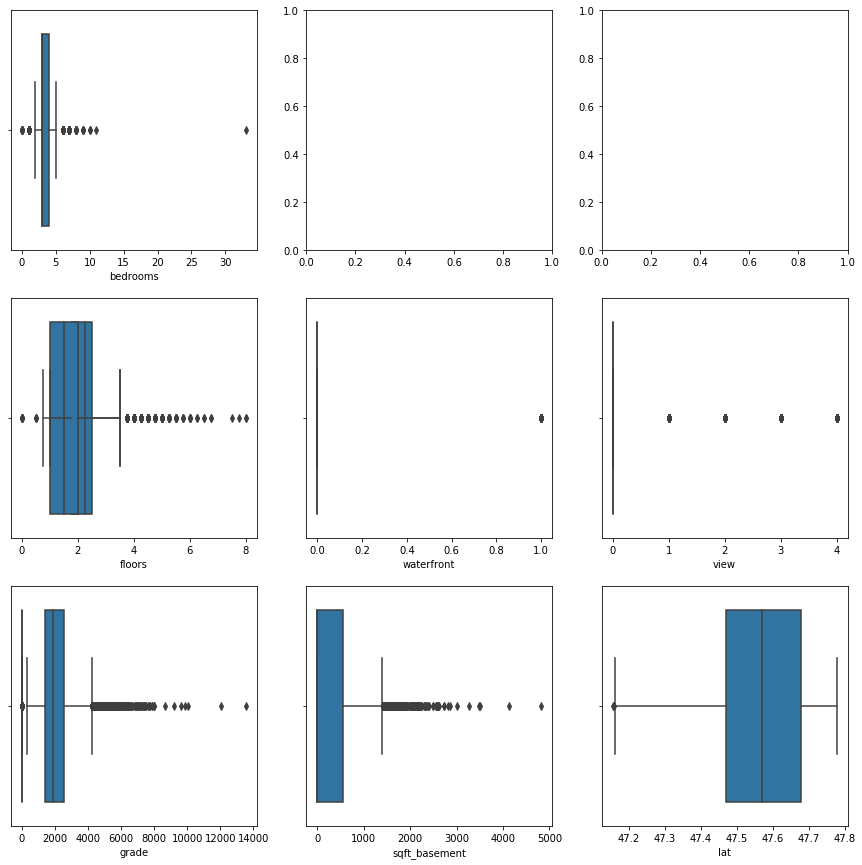

In [8]:
#lets check for some of the more extreme outliers, using boxplots, in these features,
#as they may mess  us up later on when applying regression for price
f, axes = plt.subplots(3,3,figsize=(15,15))
bed_box = sns.boxplot(high_corr['bedrooms'], ax=axes[0,0])
bath_box = sns.boxplot(high_corr['bathrooms'], ax=axes[1,0])
liv_box = sns.boxplot(high_corr['sqft_living'], ax=axes[2,0])
fl_box = sns.boxplot(high_corr['floors'], ax=axes[1,0])
wfront_box = sns.boxplot(high_corr['waterfront'], ax=axes[1,1])
view_box = sns.boxplot(high_corr['view'], ax=axes[1,2])
grade_box = sns.boxplot(high_corr['grade'], ax=axes[2,0])
base_box = sns.boxplot(high_corr['sqft_basement'], ax=axes[2,1])
lat_box = sns.boxplot(high_corr['lat'], ax=axes[2,2])

In [9]:
#the only real outlier that seems like it may not belong is the one in the bedrooms plot, lets check it out
high_corr.sort_values(by='bedrooms', ascending=False)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
15870,640000.0,33,1.75,1620,1.0,0,0,7,580,47.6878
8757,520000.0,11,3.00,3000,2.0,0,0,7,600,47.5560
15161,650000.0,10,2.00,3610,2.0,0,0,7,600,47.5705
13314,1148000.0,10,5.25,4590,1.0,0,2,9,2090,47.5861
19254,660000.0,10,3.00,2920,2.0,0,0,7,1060,47.6635
...,...,...,...,...,...,...,...,...,...,...
19452,142000.0,0,0.00,290,1.0,0,0,1,0,47.5308
8484,240000.0,0,2.50,1810,2.0,0,0,7,0,47.3493
875,1095000.0,0,0.00,3064,3.5,0,2,7,0,47.6362
8477,339950.0,0,2.50,2290,2.0,0,0,8,0,47.3473


In [10]:
#now that we found that data point, we can drop it using the index #
high_corr = high_corr.iloc[1:]
high_corr.sort_values(by='bedrooms', ascending=False).head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
15870,640000.0,33,1.75,1620,1.0,0,0,7,580,47.6878
8757,520000.0,11,3.00,3000,2.0,0,0,7,600,47.5560
13314,1148000.0,10,5.25,4590,1.0,0,2,9,2090,47.5861
19254,660000.0,10,3.00,2920,2.0,0,0,7,1060,47.6635
15161,650000.0,10,2.00,3610,2.0,0,0,7,600,47.5705


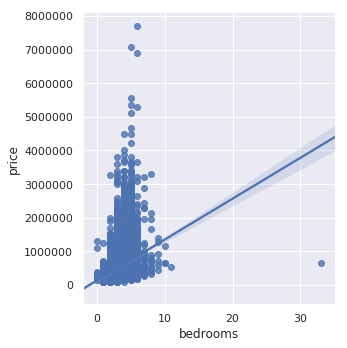

In [11]:
sns.set()
bed = sns.lmplot(x="bedrooms", y="price", data=high_corr)
plt.show()


In [12]:
#woah! thats not right, theres no way a house(that we want to look at) has 30+ bedrooms. Maybe it is a hotel or something. lets lose it

#high_corr.loc[high_corr['bedrooms']!=high_corr['bedrooms'].max()]
#high_corr.drop(high_corr['bedrooms'].idxmax())


In [13]:
high_corr['bedrooms'].max()

33

Text(0.5, 1.0, 'Correlation Heatmap - Pearson Correlation Matrix')

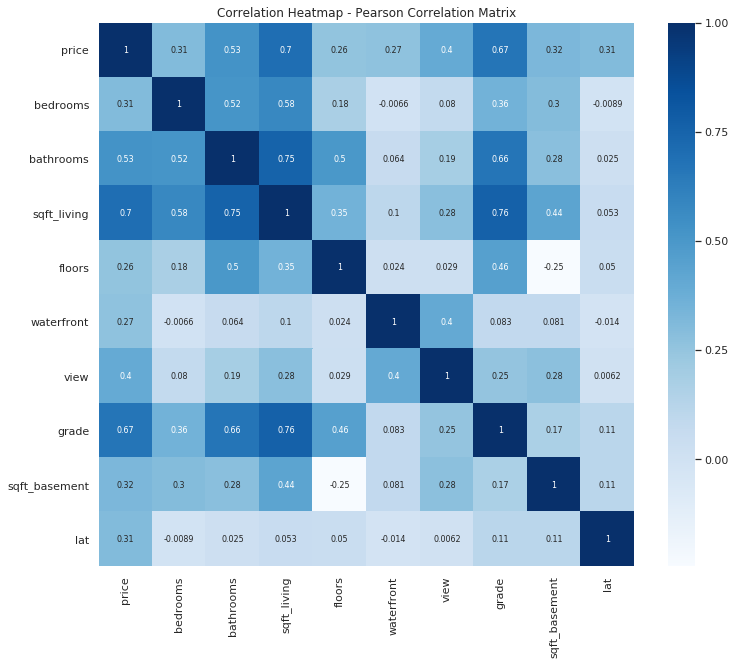

In [14]:
#making a heatmap of the different correlations to compare
new_corr = high_corr.corr()
fig_corr = plt.figure(figsize=(12, 10))
sns.heatmap(new_corr, annot=True, cmap='Blues', annot_kws={'size':8})
plt.title('Correlation Heatmap - Pearson Correlation Matrix')

In [15]:
#only keeping features with high correlations (greater than .7)
high_corr_features = new_corr[new_corr > 0.7]
high_corr_features.fillna('')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
price,1,,,0.702024,,,,,,
bedrooms,,1,,,,,,,,
bathrooms,,,1,0.754653,,,,,,
sqft_living,0.702024,,0.754653,1,,,,0.762702,,
floors,,,,,1,,,,,
waterfront,,,,,,1,,,,
view,,,,,,,1,,,
grade,,,,0.762702,,,,1,,
sqft_basement,,,,,,,,,1,
lat,,,,,,,,,,1


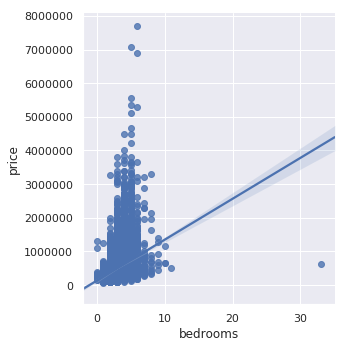

In [16]:

sns.set()
bed = sns.lmplot(x="bedrooms", y="price", data=high_corr)
plt.show()

In [17]:
#now, we need to normalize the features so they can be effectively compared and processed in regression
#here we will normalize the features (not including price) using z-score

#creating new dataframe for the normalized data
normed = high_corr

#using the formula for z-score on all the features in the dataframe (not price)
normed.iloc[:, 1:] = (high_corr - high_corr.mean())/high_corr.std()


normed.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
1,538000.0,-0.398739,0.175540,0.533576,0.936438,-0.087173,-0.30576,-0.558840,0.245102,1.161502
2,180000.0,-1.473915,-1.447534,-1.426265,-0.915445,-0.087173,-0.30576,-1.409558,-0.658688,1.283465
3,604000.0,0.676438,1.149384,-0.130592,-0.915445,-0.087173,-0.30576,-0.558840,1.397434,-0.283292
4,510000.0,-0.398739,-0.149075,-0.435456,-0.915445,-0.087173,-0.30576,0.291878,-0.658688,0.409516
5,1225000.0,0.676438,3.097073,3.636658,-0.915445,-0.087173,-0.30576,2.844033,2.798308,0.693134


In [18]:
#to do: make a line graph that compares average home prices over the years
yr_prices = df.groupby(['date']).mean().drop(['id'], axis=1)
#sns.lineplot(x='date',y='price', data=yr_prices)

yr_prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,
20140502T000000,526251.492537,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.0,0.223881,3.447761,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
20140503T000000,466970.000000,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.0,0.000000,3.500000,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
20140504T000000,576690.000000,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.0,0.400000,3.400000,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
20140505T000000,580938.607143,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.0,0.202381,3.440476,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
20140506T000000,534047.903614,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.0,0.120482,3.349398,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880


In [20]:
#sorting by zipcodes and dropping the id column
zips = df.groupby(['zipcode']).mean()
zips = zips.drop(['id'], axis=1)

#displaying price as floats with two decimal places, rather thatn the default scientific notation
pd.options.display.float_format = '{:.2f}'.format

zips.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,
98001,280804.69,3.38,2.01,1900.86,14937.45,1.43,0.00,0.10,3.34,7.30,1721.33,179.53,1980.68,43.80,47.31,-122.27,1828.86,11214.40
98002,234284.04,3.33,1.84,1627.74,7517.63,1.33,0.00,0.01,3.74,6.69,1522.54,105.21,1967.77,59.89,47.31,-122.21,1479.03,7585.48
98003,294111.28,3.36,2.05,1928.88,10603.10,1.31,0.00,0.21,3.37,7.54,1663.55,265.33,1976.89,21.36,47.32,-122.31,1876.20,9746.18
98004,1355927.08,3.85,2.53,2909.02,13104.22,1.43,0.00,0.31,3.50,8.69,2419.84,489.18,1971.47,208.15,47.62,-122.21,2674.70,12805.02
98005,810164.88,3.85,2.42,2656.80,19928.79,1.28,0.00,0.10,3.70,8.49,2160.20,496.61,1969.74,47.63,47.61,-122.17,2567.86,18367.77


In [21]:
#getting the number of homes sold in each zipcode as a dataframe
df_zip_counts = df.groupby('zipcode')['id'].nunique()
df_zip_counts.sort_values(ascending=False)
df_zip_counts = pd.DataFrame(df_zip_counts)
df_zip_counts.rename(columns={'id':'homes_sold'}, inplace=True)


In [22]:
#Merging the two dataframes on zipcode to get the # of homes sold into the dataframe
zips = pd.merge(zips, df_zip_counts, how='inner', on= 'zipcode')
zips.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,homes_sold
zipcode,,,,,,,,,,,,,,,,,,,
98001,280804.69,3.38,2.01,1900.86,14937.45,1.43,0.00,0.10,3.34,7.30,1721.33,179.53,1980.68,43.80,47.31,-122.27,1828.86,11214.40,359
98002,234284.04,3.33,1.84,1627.74,7517.63,1.33,0.00,0.01,3.74,6.69,1522.54,105.21,1967.77,59.89,47.31,-122.21,1479.03,7585.48,197
98003,294111.28,3.36,2.05,1928.88,10603.10,1.31,0.00,0.21,3.37,7.54,1663.55,265.33,1976.89,21.36,47.32,-122.31,1876.20,9746.18,276
98004,1355927.08,3.85,2.53,2909.02,13104.22,1.43,0.00,0.31,3.50,8.69,2419.84,489.18,1971.47,208.15,47.62,-122.21,2674.70,12805.02,315
98005,810164.88,3.85,2.42,2656.80,19928.79,1.28,0.00,0.10,3.70,8.49,2160.20,496.61,1969.74,47.63,47.61,-122.17,2567.86,18367.77,168


In [23]:
#lets make a normalized version of the homes sold in each zip code. We can use this later in our notebook
zips['homes_sold_norm'] = (zips['homes_sold']-zips['homes_sold'].min())/(zips['homes_sold'].max()-zips['homes_sold'].min())
zips.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,homes_sold,homes_sold_norm
zipcode,,,,,,,,,,,,,,,,,,,,
98001,280804.69,3.38,2.01,1900.86,14937.45,1.43,0.00,0.10,3.34,7.30,1721.33,179.53,1980.68,43.80,47.31,-122.27,1828.86,11214.40,359,0.56
98002,234284.04,3.33,1.84,1627.74,7517.63,1.33,0.00,0.01,3.74,6.69,1522.54,105.21,1967.77,59.89,47.31,-122.21,1479.03,7585.48,197,0.27
98003,294111.28,3.36,2.05,1928.88,10603.10,1.31,0.00,0.21,3.37,7.54,1663.55,265.33,1976.89,21.36,47.32,-122.31,1876.20,9746.18,276,0.41
98004,1355927.08,3.85,2.53,2909.02,13104.22,1.43,0.00,0.31,3.50,8.69,2419.84,489.18,1971.47,208.15,47.62,-122.21,2674.70,12805.02,315,0.48
98005,810164.88,3.85,2.42,2656.80,19928.79,1.28,0.00,0.10,3.70,8.49,2160.20,496.61,1969.74,47.63,47.61,-122.17,2567.86,18367.77,168,0.22


In [24]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook, curdoc
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RangeSlider

In [25]:
output_notebook()

Loading BokehJS ...

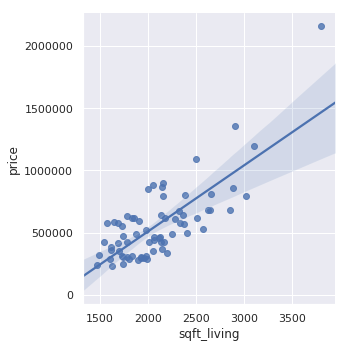

In [26]:
sns.set()
bed = sns.lmplot(x="sqft_living", y="price", data=zips
            )
plt.show()

In [27]:

output_file("sqft x price.html")
source = ColumnDataSource(data=zips)

#creating tooltips for the hovertool
TOOLTIPS = [('zipcode','@zipcode'),('Average Square Footage','@sqft_living{0,0} sq ft'),
            ('Average Selling Price','@price{$0,0.00}'),('# of Homes Sold','@homes_sold')]

p = figure(title = 'Hover mouse over points to see values',tooltips=TOOLTIPS)

#setting axis labels
p.xaxis.axis_label = 'Living Space (Sq Ft)'
p.yaxis.axis_label = 'Average Selling Price'

#formatting ticks on labels to the correct format
p.xaxis[0].formatter = NumeralTickFormatter(format='0,0')
p.yaxis[0].formatter = NumeralTickFormatter(format='$0,0.00')

#setting color of area outside of graph
p.border_fill_color = "whitesmoke"



#inputing data, using the normailzed # of homes sold values as the fill
p.circle(x='sqft_living',y='price', size  =20, hover_fill_color="firebrick",fill_alpha='homes_sold_norm',source=zips)

#hiding the peky toolbar until its needed (it shows when the mouse is on the plot)
p.toolbar.autohide = True

show(p)
